In [ ]:
# PDI : modèle de qualification en utilisant l’analyse sémantique des URLs
# La base d’apprentissage contient un ensemble de données relatives aux enchères gagnées au cours du mois de septembre : qualificationLearning_semantic.csv. Il y a également une base de test qui contient les données relatives aux enchères gagnées au cours des 15 premiers jours d’octobre : qualificationTesting_semantic.csv"

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data preprocessing

In [ ]:
data = pd.read_csv('qualificationLearning_semantic.csv')
data.head()

,page,ssp,bidCountryCode,hour,impressionType,bannerFormat,nativePlacementCount,nativeFormat,device,placementType,placementId,catalogId,logRatio,numContextual,isQualified
0,https://www.babelio.com/livres/Madden-Mills-St...,google,FR,20.0,native,NaN,google_1,google_1200x627,2,NaN,babelio.com_google_NA_2_native_NA,329,-2.192324,0,True
1,https://actu.fr/occitanie/perpignan_66136/perp...,google,FR,14.0,banner,970x90,google_NA,google_NA,2,NaN,actu.fr_google_NA_2_display_970x90,329,-2.295260,1,False
2,https://www.leboncoin.fr/recherche,google,FR,22.0,native,NaN,google_1,google_1200x627,2,NaN,leboncoin.fr_google_NA_2_native_NA,329,-2.813411,0,True
3,https://www.msn.com,google,FR,14.0,banner,728x90,google_NA,google_NA,2,NaN,msn.com_google_NA_2_display_728x90,329,0.000000,0,True
4,https://actu.fr/occitanie/le-perthus_66137/l-a...,google,FR,5.0,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,329,-3.108149,1,False


In [ ]:
data_test = pd.read_csv('qualificationTesting_semantic.csv')
data_test.head()

,page,ssp,bidCountryCode,hour,impressionType,bannerFormat,nativePlacementCount,nativeFormat,device,placementType,placementId,catalogId,logRatio,numContextual,isQualified
0,https://www.geo.fr/environnement/une-technique...,google,FR,20,banner,320x50,google_NA,google_NA,4,NaN,geo.fr_google_NA_4_display_320x50,308,-5.077255,0,False
1,https://actu.fr/normandie/lonlay-l-abbaye_6123...,google,FR,12,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,308,0.000000,0,True
2,https://actu.fr/normandie/fermanville_50178/co...,google,FR,8,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,308,-4.615121,0,True
3,https://actu.fr/monde/les-restes-d-un-alpinist...,google,FR,9,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,308,-6.013715,0,False
4,https://www.750g.com/gaufres-au-companion-r943...,rubicon,FR,18,native,NaN,rubicon_1,rubicon_NA,1,2.0,750g.com_rubicon_2796526_1_native_NA,308,-5.855072,0,False


In [ ]:
data_test.shape

(130480, 15)

In [ ]:
# data_oct = pd.read_csv('qualificationTesting_semantic.csv')
# data_oct.head()

In [ ]:
data.describe()

,hour,device,placementType,catalogId,logRatio,numContextual
count,154695.000000,177527.000000,154598.000000,177527.000000,177527.000000,177527.000000
mean,14.526494,3.746061,2.158508,431.812620,-3.589127,0.173613
std,5.382224,0.770877,1.192243,47.830172,1.794951,0.378777
min,0.000000,1.000000,1.000000,136.000000,-7.480935,0.000000
25%,10.000000,4.000000,1.000000,424.000000,-4.961430,0.000000
50%,15.000000,4.000000,2.000000,442.000000,-3.878315,0.000000
75%,19.000000,4.000000,4.000000,467.000000,-2.957511,0.000000
max,23.000000,5.000000,11.000000,478.000000,0.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177527 entries, 0 to 177526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   page                  177519 non-null  object 
 1   ssp                   177527 non-null  object 
 2   bidCountryCode        177527 non-null  object 
 3   hour                  154695 non-null  float64
 4   impressionType        177527 non-null  object 
 5   bannerFormat          20664 non-null   object 
 6   nativePlacementCount  176187 non-null  object 
 7   nativeFormat          176187 non-null  object 
 8   device                177527 non-null  int64  
 9   placementType         154598 non-null  float64
 10  placementId           177527 non-null  object 
 11  catalogId             177527 non-null  int64  
 12  logRatio              177527 non-null  float64
 13  numContextual         177527 non-null  int64  
 14  isQualified           177527 non-null  bool   
dtype

In [ ]:
data.isna().sum()

,0
page,8
ssp,0
bidCountryCode,0
hour,22832
impressionType,0
bannerFormat,156863
nativePlacementCount,1340
nativeFormat,1340
device,0
placementType,22929


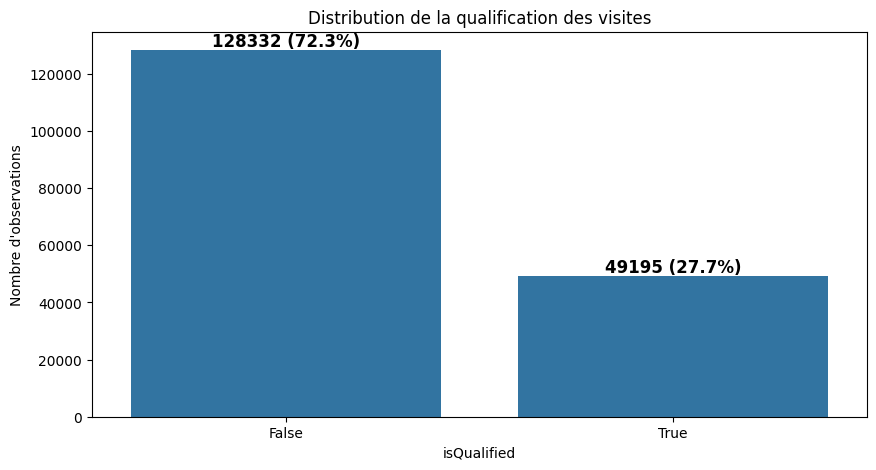

In [ ]:
plt.figure(figsize=(10,5))
# ax = sns.countplot(x='isQualified',data=data)
# counts = data['isQualified'].value_counts()
# for category, count in counts.items():
#     ax.text(category, count, str(count), ha='center', va='bottom')
# plt.show()
ax = sns.countplot(x='isQualified',data=data)
counts = data['isQualified'].value_counts()
total = len(data)  # Nombre total d'observations

# Ajout des annotations (volume et pourcentage)
for category, count in counts.items():
    percentage = (count / total) * 100  # Calcul du pourcentage
    ax.text(category, count + 1, f"{count} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Affichage du graphique
plt.title("Distribution de la qualification des visites")
plt.xlabel("isQualified")
plt.ylabel("Nombre d'observations")
plt.show()

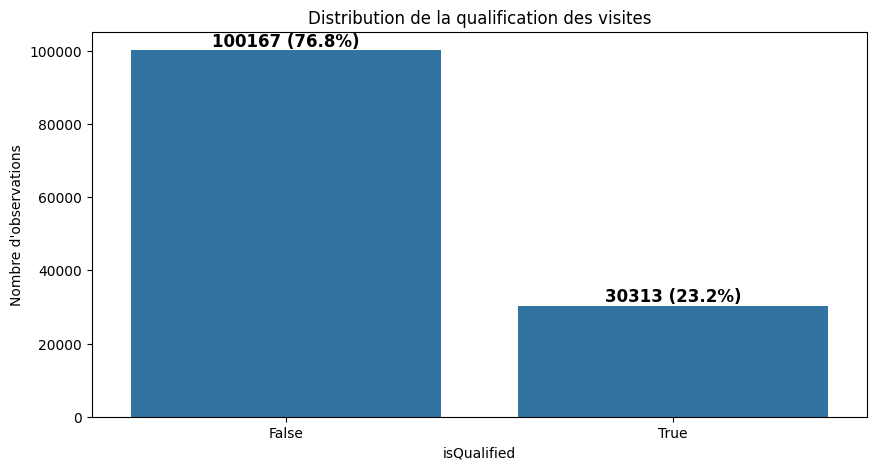

In [ ]:
plt.figure(figsize=(10,5))
# ax = sns.countplot(x='isQualified',data=data)
# counts = data['isQualified'].value_counts()
# for category, count in counts.items():
#     ax.text(category, count, str(count), ha='center', va='bottom')
# plt.show()
ax = sns.countplot(x='isQualified',data=data_test)
counts = data_test['isQualified'].value_counts()
total = len(data_test)  # Nombre total d'observations

# Ajout des annotations (volume et pourcentage)
for category, count in counts.items():
    percentage = (count / total) * 100  # Calcul du pourcentage
    ax.text(category, count + 1, f"{count} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Affichage du graphique
plt.title("Distribution de la qualification des visites")
plt.xlabel("isQualified")
plt.ylabel("Nombre d'observations")
plt.show()

In [ ]:
data.value_counts('isQualified')

,count
isQualified,
False,128332
True,49195


In [ ]:
data_test.value_counts('isQualified')

,count
isQualified,
False,100167
True,30313


In [ ]:
# def small_data(data,n_data = 10000):
#   final_data = data.copy()
#   true_data = final_data[final_data['isQualified']==1]
#   false_data = final_data[final_data['isQualified']==0]
#   final_data = pd.concat([true_data.sample(n=n_data),false_data.sample(n=n_data)])
#   return final_data
# final_data = small_data(data)
# final_test_data = small_data(data_test)

In [ ]:
print(data.shape)
print(data_test.shape)

(177527, 15)
(130480, 15)


In [ ]:
from sklearn.utils import resample

final_data = resample(data, replace=False, n_samples=int(len(data) * 0.3), random_state=42) #sans remplacement en gardant la distribution globale des attributs
final_test_data = resample(data_test, replace=False, n_samples=int(len(data_test) * 0.3), random_state=42)

In [ ]:
final_data = data
final_test_data = data_test

In [ ]:
final_data.value_counts('isQualified')
print(final_data.shape)
print(final_test_data.shape)

(177527, 15)
(130480, 15)


Le volume de bid request qu'on observe ici est le nombre de bid request qui ont été accepté et où il y a eu des vues et des clics. A partir de cet échantillon de bid request bien précis, on regarde la proportion de bid request qui ont été qualifié "où la durée de temps sur le site a dépassé les 30 secondes" comparé à celle qui n'a pas été qualifié. Ici on des bons volumes, on a pas de problème de biais. Le volume de chaque classe est proportionnelle à l'autre.

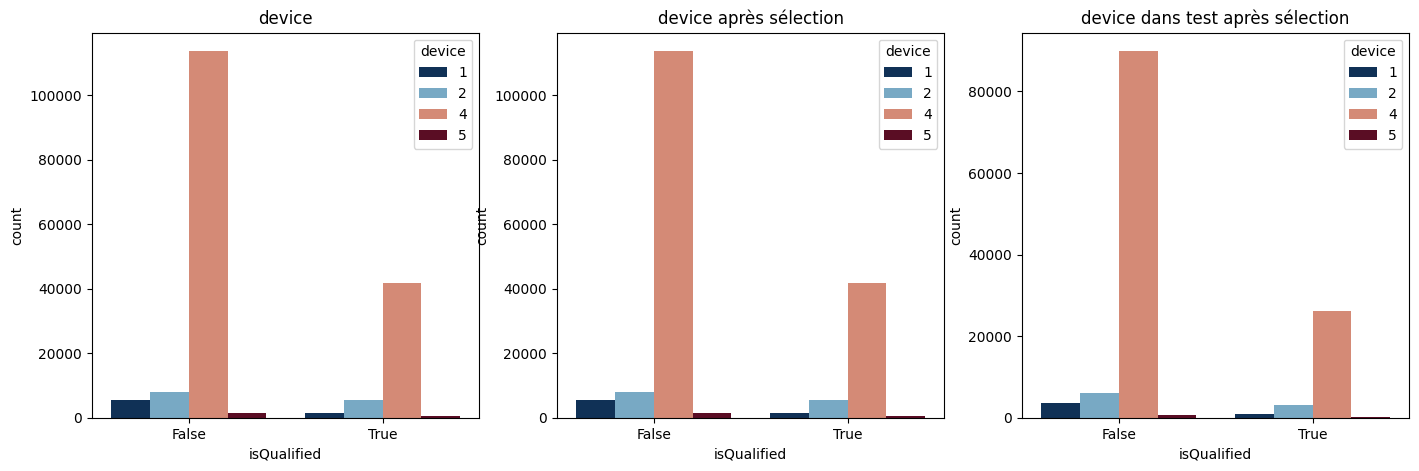

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.countplot(x='isQualified',data=data,hue='device',palette='RdBu_r')
plt.title('device')
plt.subplot(1,3,2)
sns.countplot(x='isQualified',data=final_data,hue='device',palette='RdBu_r')
plt.title('device après sélection')
plt.subplot(1,3,3)
sns.countplot(x='isQualified',data=final_test_data,hue='device',palette='RdBu_r')
plt.title('device dans test après sélection')
plt.show()

Le plus important c'est le mobile en majorité écrasante. Puis, on a l'ordi personnel puis les tablettes.

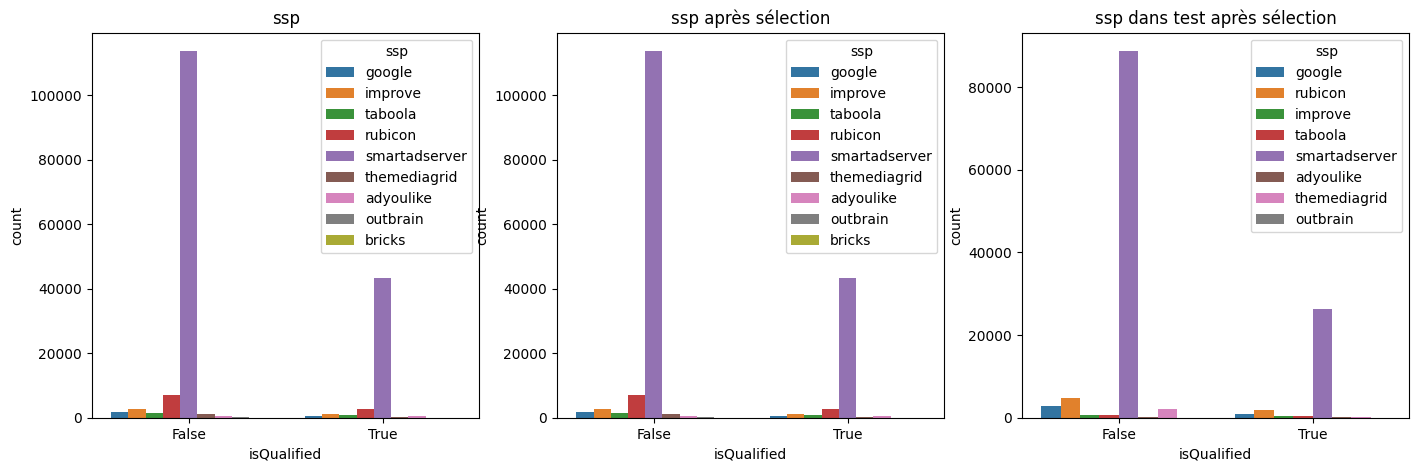

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.countplot(x='isQualified',data=data,hue='ssp')
plt.title('ssp')
plt.subplot(1,3,2)
sns.countplot(x='isQualified',data=final_data,hue='ssp')
plt.title('ssp après sélection')
plt.subplot(1,3,3)
sns.countplot(x='isQualified',data=final_test_data,hue='ssp')
plt.title('ssp dans test après sélection')
plt.show()

Le plus gros fournisseur de bid request est smartaddserver suivi par rubicon, google et improve.

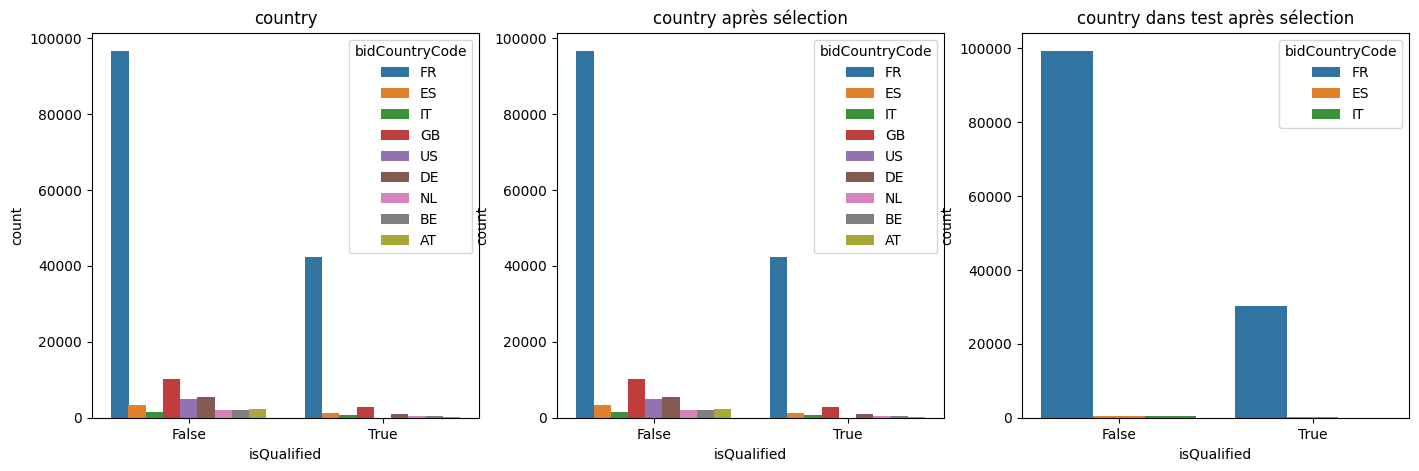

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.countplot(x='isQualified',data=data,hue='bidCountryCode')
plt.title('country')
plt.subplot(1,3,2)
sns.countplot(x='isQualified',data=final_data,hue='bidCountryCode')
plt.title('country après sélection')
plt.subplot(1,3,3)
sns.countplot(x='isQualified',data=final_test_data,hue='bidCountryCode')
plt.title('country dans test après sélection')
plt.show()

En majorité en France ce qui est logique

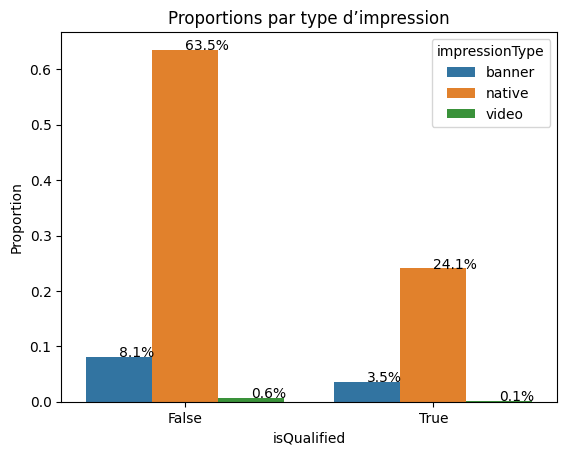

In [ ]:
ax = sns.countplot(x='isQualified',data=data,hue='impressionType', stat='proportion')
for container in ax.containers:  # Parcourt chaque groupe de barres
    for bar in container:        # Parcourt chaque barre individuelle
        # Récupérer la hauteur de la barre (proportion)
        height = bar.get_height()
        if height > 0:  # Si la barre a une hauteur
            # Position et annotation du pourcentage
            ax.annotate(f'{height*100:.1f}%',(bar.get_x() + bar.get_width() / 2, height))
plt.title('Proportions par type d’impression')
plt.ylabel('Proportion')
plt.xlabel('isQualified')
plt.show()

On voit que parmi toutes les bid request 25% des natives sont qualifiées et 64% non qualifiées.

Le format natif est majoritaire dans les deux cas, il s'agit des publicité cohérentes avec le lien qu'on a. Ici on voit que les publicités qualifiées sont majoritairement natives ce qui est cohérent.

In [ ]:
data.head()

,page,ssp,bidCountryCode,hour,impressionType,bannerFormat,nativePlacementCount,nativeFormat,device,placementType,placementId,catalogId,logRatio,numContextual,isQualified
0,https://www.babelio.com/livres/Madden-Mills-St...,google,FR,20.0,native,NaN,google_1,google_1200x627,2,NaN,babelio.com_google_NA_2_native_NA,329,-2.192324,0,True
1,https://actu.fr/occitanie/perpignan_66136/perp...,google,FR,14.0,banner,970x90,google_NA,google_NA,2,NaN,actu.fr_google_NA_2_display_970x90,329,-2.295260,1,False
2,https://www.leboncoin.fr/recherche,google,FR,22.0,native,NaN,google_1,google_1200x627,2,NaN,leboncoin.fr_google_NA_2_native_NA,329,-2.813411,0,True
3,https://www.msn.com,google,FR,14.0,banner,728x90,google_NA,google_NA,2,NaN,msn.com_google_NA_2_display_728x90,329,0.000000,0,True
4,https://actu.fr/occitanie/le-perthus_66137/l-a...,google,FR,5.0,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,329,-3.108149,1,False


## Feature : URL
Pour l'instant on va utiliser la colonne page. On va préparer les données pour la fonction word2vec :

In [ ]:
import torch
import string
from torch.utils.data import Dataset, DataLoader
from collections import Counter

In [ ]:
target = final_data['isQualified']
target_test = final_test_data['isQualified']
page = final_data['page']
page_test = final_test_data['page']

In [ ]:
# !pip install torchtext==0.13.1

### Tokenisation et word2vec

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
lemmatizer = WordNetLemmatizer()
mots_vides = set(stopwords.words('french'))
stop_words = set(stopwords.words('english'))
print(mots_vides)

{'ayantes', 'aies', 'eussions', 'moi', 'ses', 's', 'étés', 'fussent', 'aviez', 'sois', 'aient', 'dans', 'êtes', 'eut', 'étée', 'des', 'nous', 'ton', 'ta', 'suis', 'ont', 'je', 'eût', 'de', 'fus', 'est', 'aurions', 'eux', 'aux', 'me', 'te', 'furent', 'sommes', 'sont', 'aurais', 'eusse', 'avaient', 'ait', 'serait', 'eussent', 'eues', 'que', 'notre', 'vos', 'du', 'as', 'pour', 'eûmes', 'toi', 'eurent', 'elle', 'on', 'étant', 'eûtes', 'ces', 'lui', 'étais', 'à', 'eus', 'se', 'au', 'aie', 'eue', 'sur', 'étées', 'seront', 'il', 'était', 'nos', 'avons', 'étante', 'avez', 'fusse', 'ayez', 'mais', 'serions', 'serai', 'avait', 'et', 'serez', 'soyez', 'auras', 'votre', 'serons', 'n', 'soient', 'les', 'ou', 'seras', 'tu', 'eu', 'fûtes', 'auront', 'leur', 'fussions', 'avec', 'même', 'seraient', 'été', 'fût', 'avions', 'ma', 'es', 'par', 'aurons', 'aurai', 'y', 'ayante', 'd', 'auraient', 'ayants', 't', 'sera', 'étaient', 'aurez', 'fussiez', 'fûmes', 'ai', 'qu', 'j', 'étantes', 'ayant', 'le', 'étants

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
mots_vides = set(stopwords.words('french') + stopwords.words('english'))
common_words = {'http','https','www','purepeople','html'} #ces mots ne fournissent pas d'info supplémentaire
mots_vides.update(common_words)
# stop_words.update(common_words)
# mots_vides.update(common_words)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, page_series, target):
        self.page_series = page_series
        self.target = target
        self.data = [(str(item),target) for item,target in zip(self.page_series,self.target) if str(item)]  # Enlever les chaines vides

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text,target = self.data[idx]
        text = text.lower()  #minuscule
        slash_count = text.count("/") - text.count("//") #nombre de slash
        text = text.translate(str.maketrans(string.punctuation,' ' * len(string.punctuation))) #remplacer les ponctuations par des espaces
        text = " ".join([lemmatizer.lemmatize(token) for token in text.split()])
        text = " ".join([token for token in text.split() if token not in mots_vides and len(token)>1]) #supprimer les mots vides , amènent pas d'info, ajouter les anglais
        if 'fr' in text: #mettre un filtre déjà sur le français
            tokens = word_tokenize(text,'french')
        else: #les pages en com et uk sont généralement en anglais
            tokens = word_tokenize(text,'english')
        return {"tokens":tokens,"text": text, "slash_count": slash_count,"target":target}

In [ ]:
text_dataset= TextDataset(page,target) #créer un pytorch dataset du dataframe page
text_test_dataset = TextDataset(page_test,target_test)

In [ ]:
len(text_dataset)

177527

In [ ]:
# filtered_dataset = [item for item in text_dataset if item['slash_count']>3] #garder les éléments avec des sous pages

In [ ]:
X = [item['tokens'] for item in text_dataset]
X_test = [item['tokens'] for item in text_test_dataset]
y = [item['target'] for item in text_dataset]
y_test = [item['target'] for item in text_test_dataset]

In [ ]:
# from sklearn.model_selection import train_test_split
# text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X)

177527

In [ ]:
# np.argmax([len(item.split()) for item in text_dataset])

In [ ]:
vocab = Counter([item for sublist in X for item in sublist]) #attribuer à chaque mot du dataset son nombre d'occurences

In [ ]:
dict(sorted(vocab.items(), key=lambda item: item[1],reverse=True)[:10])

{'com': 107038,
 'fr': 51648,
 'utm': 33748,
 'news': 13631,
 'medium': 13405,
 '2024': 12132,
 'article': 11560,
 'source': 10710,
 'campaign': 8520,
 'jeuxvideo': 8156}

La méthode que je veux utiliser est d'implémenter un autoencodeur (apprentissage non supervisé). Comme le vecteur dans l'espace latent décrit le mieux ma données en entrée, je vais pouvoir l'extraire et utiliser cette information.

In [ ]:
import gensim
print(gensim.__version__)
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

4.3.3


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.nn.utils.rnn import pad_sequence
from torch.nn import Embedding

In [ ]:
# model = Word2Vec(sentences=text_train, vector_size=20, window=5, min_count=1, workers=4)
# model.train(text_train, total_examples=len(text_train), epochs=1)

In [ ]:
# model.wv[tokens[0]].shape

In [ ]:
# vectors = []
# for token in text_train:
#   vectors.append(model.wv[token])
# print(len(vectors))
# print(len(vectors[0][0]))
# padded_vectors = pad_sequence([torch.tensor(vec) for vec in vectors], batch_first=True, padding_value=0)

In [ ]:
vocab_size = len(vocab)
embedding_dim = 20
hidden_dim = 512
latent_dim = 10

In [ ]:
word2idx = {token: idx for idx, token in enumerate(vocab)}
idx2word = {idx: token for idx, token in enumerate(word2idx)}
numerical_sequence = [[word2idx[token] for token in sublist] for sublist in X]
padded_sequence = pad_sequence([torch.tensor(seq) for seq in numerical_sequence], batch_first=True, padding_value=0)

In [ ]:
input_dim = padded_sequence.shape[1]
vocab_size

142490

In [ ]:
class URLVAE(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, latent_dim, max_len,dropout_rate=0.15):
        super(URLVAE, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Encodeur
        self.encoder = nn.Sequential(
            nn.Linear(max_len * embedding_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim), #Améliore la stabilité de l'entraînement en réduisant le covariate shift, accélère la convergence en permettant un meilleur flow du gradient & Normalise les activations de chaque mini-batch pour éviter les problèmes de vanishing/exploding gradients.
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Décodeur
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, max_len * embedding_dim),
            nn.Sigmoid()
        )

        self.max_len = max_len
        self.embedding_dim = embedding_dim

    def encode(self, x):
        embedded = self.embedding(x)  # x : batch de tokens
        flattened = embedded.view(embedded.size(0), -1)
        h = self.encoder(flattened)
        mu, logvar = self.fc_mu(h), self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder(z)#.reshape(-1, self.max_len, self.embedding_dim)
        reconstructed = h.view(-1, self.max_len ,self.embedding_dim)
        return reconstructed

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

In [ ]:
# print(f"Train size: {len(train_padded_sequence)}, Validation size: {len(val_padded_sequence)}")
type(padded_sequence)

torch.Tensor

In [ ]:
import torch
from sklearn.model_selection import train_test_split
model_path = "best_model_2.pth"
# Séparation des données (80% train, 20% validation)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # On garde un ratio de 50%
x_train_bal, y_train_bal = rus.fit_resample(padded_sequence, y)
print(x_train_bal.shape)
y_train_bal = np.array(y_train_bal)
print(y_train_bal[y_train_bal == 0].shape[0])
print(y_train_bal[y_train_bal == 1].shape[0])
x_train_bal = torch.tensor(x_train_bal)
train_padded_sequence, val_padded_sequence = train_test_split(x_train_bal, test_size=0.2, random_state=42)

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model_vae = URLVAE(vocab_size, embedding_dim, hidden_dim, latent_dim, input_dim)
# loss_vae = torch.nn.MSELoss()
loss_vae = torch.nn.SmoothL1Loss()
optimizer_vae = torch.optim.AdamW(model_vae.parameters(), lr=0.001, weight_decay=1e-5)

# Paramètres d'entraînement
n_epochs = 100
patience = 5
best_val_loss = 100
epochs_no_improve = 0
train_loss_hist = []
val_loss_hist = []

# Boucle d'entraînement
for epoch in range(n_epochs):
    model_vae.train()  # Mode entraînement

    # Préparer les entrées
    train_input = train_padded_sequence.reshape(-1, input_dim)
    train_inputs = model_vae.embedding(train_input)

    # Forward pass
    train_outputs, _, _ = model_vae(train_input)
    train_loss = loss_vae(train_outputs, train_inputs)

    # Backpropagation
    optimizer_vae.zero_grad()
    train_loss.backward()
    optimizer_vae.step()

    train_loss_hist.append(train_loss.item())

    ### Validation ###
    model_vae.eval()
    with torch.no_grad():
        val_input = val_padded_sequence.reshape(-1, input_dim)
        val_inputs = model_vae.embedding(val_input)

        val_outputs, _, _ = model_vae(val_input)
        val_loss = loss_vae(val_outputs, val_inputs)

    val_loss_hist.append(val_loss.item())

    # Early stopping basé sur la validation
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model_vae.state_dict(), model_path)  # Sauvegarde du meilleur modèle
    else:
        epochs_no_improve += 1

    print(f"Epoch {epoch+1}: Train Loss = {train_loss.item():.4f}, Val Loss = {val_loss.item():.4f}, epochs no improve = {epochs_no_improve}")

    if epochs_no_improve == patience:
        print(f"Early stopping at epoch {epoch+1}, Best Val Loss: {best_val_loss:.4f}")
        break


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(147585, 126)
98390
49195
Epoch 1: Train Loss = 0.1563, Val Loss = 0.1459, epochs no improve = 0
Epoch 2: Train Loss = 0.1410, Val Loss = 0.1433, epochs no improve = 0
Epoch 3: Train Loss = 0.1178, Val Loss = 0.1406, epochs no improve = 0
Epoch 4: Train Loss = 0.0992, Val Loss = 0.1378, epochs no improve = 0
Epoch 5: Train Loss = 0.0836, Val Loss = 0.1345, epochs no improve = 0
Epoch 6: Train Loss = 0.0713, Val Loss = 0.1301, epochs no improve = 0
Epoch 7: Train Loss = 0.0609, Val Loss = 0.1245, epochs no improve = 0
Epoch 8: Train Loss = 0.0529, Val Loss = 0.1165, epochs no improve = 0
Epoch 9: Train Loss = 0.0469, Val Loss = 0.1055, epochs no improve = 0
Epoch 10: Train Loss = 0.0423, Val Loss = 0.0923, epochs no improve = 0
Epoch 11: Train Loss = 0.0386, Val Loss = 0.0787, epochs no improve = 0
Epoch 12: Train Loss = 0.0359, Val Loss = 0.0661, epochs no improve = 0
Epoch 13: Train Loss = 0.0339, Val Loss = 0.0558, epochs no improve = 0
Epoch 14: Train Loss = 0.0324, Val Loss = 0.047

In [ ]:
model_vae = URLVAE(vocab_size, embedding_dim, hidden_dim, latent_dim, input_dim)

model_vae.load_state_dict(torch.load(model_path))

model_vae.eval()

<ipython-input-50-98489d66a9dc>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_vae.load_state_dict(torch.load(model_path))


URLVAE(
  (embedding): Embedding(142490, 20, padding_idx=0)
  (encoder): Sequential(
    (0): Linear(in_features=2520, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.15, inplace=False)
  )
  (fc_mu): Linear(in_features=512, out_features=10, bias=True)
  (fc_logvar): Linear(in_features=512, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_

torch.Size([177527, 10])
torch.Size([177527, 10])


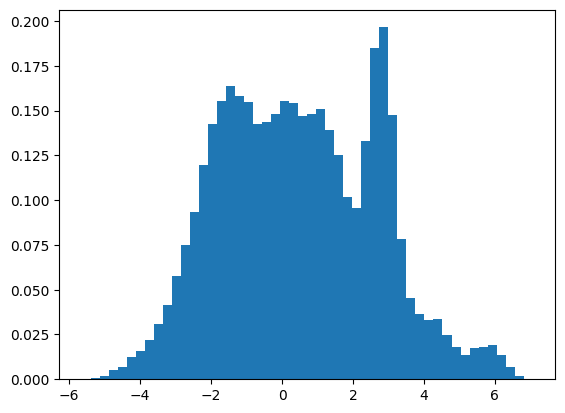

-15.537199 35.115585
(177527, 10)


In [ ]:
input = padded_sequence.reshape(-1, input_dim)
mu, log= model_vae.encode(input)
print(mu.shape)
print(log.shape)
z = model_vae.reparameterize(mu, log)
z = z.detach().numpy()
# effectuer une pca sur la matrice de covariance log pour avoir une visualisation plus claire
plt.hist(z[:,6],bins=50,density=True)
plt.show()
print(np.min(z),np.max(z))
print(z.shape)

In [ ]:
y_train = np.array(y)
y_train.shape

(177527,)

In [ ]:
import xgboost
xgboost.__version__

'2.1.4'

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'

In [ ]:
scaler = MinMaxScaler()
z = scaler.fit_transform(z)

In [ ]:
classif_model = XGBClassifier()
classif_model.fit(z,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = classif_model.predict(z)
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_pred))

0.7586789615100802
[[120927   7405]
 [ 35436  13759]]
              precision    recall  f1-score   support

       False       0.77      0.94      0.85    128332
        True       0.65      0.28      0.39     49195

    accuracy                           0.76    177527
   macro avg       0.71      0.61      0.62    177527
weighted avg       0.74      0.76      0.72    177527

0.6109904982007851


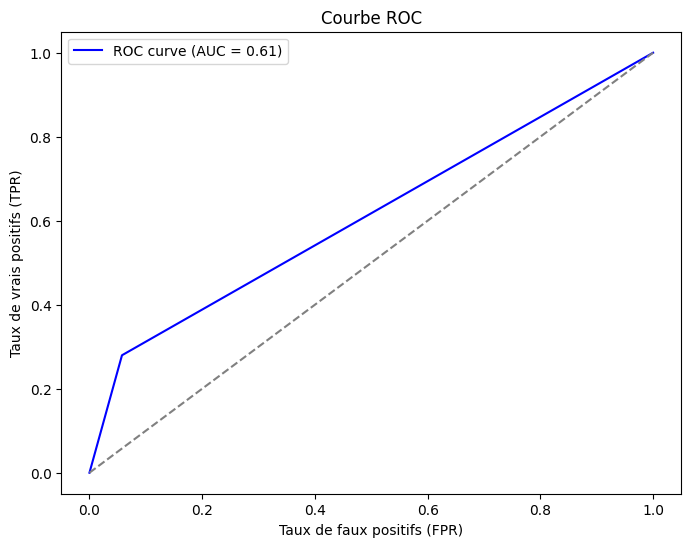

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [ ]:
# y_train_pred = classif_model.predict(z)
# print(accuracy_score(y_train,y_train_pred))
# print(confusion_matrix(y_train,y_train_pred))
# print(classification_report(y_train,y_train_pred))

In [ ]:
# roc_auc_score(y_train,y_train_pred)

In [ ]:
numerical_sequence_test = [[word2idx.get(token,0) for token in sublist] for sublist in page_test]
padded_sequence_test = pad_sequence([torch.tensor(seq) for seq in numerical_sequence_test], batch_first=True, padding_value=0)
input_dim_test = padded_sequence_test.shape[1]
if input_dim_test > input_dim:
  padded_sequence_test = padded_sequence_test[:,:input_dim]
  input_dim_test = input_dim
input_test = padded_sequence_test.reshape(-1, input_dim_test)
# outputs_test, _,_ = model_vae(input_test)
# embedded= model_vae.embedding(input_test)
# flattened = embedded.view(embedded.size(0), -1)
# print(flattened.shape)
# h = model_vae.encoder(flattened)
# print(h.shape)
mu_test, log_test= model_vae.encode(input_test)
z_test = model_vae.reparameterize(mu_test, log_test)
z_test = z_test.detach().numpy()
z_test = scaler.transform(z_test)
y_test = np.array(target_test)
y_test_pred = classif_model.predict(z_test)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_pred))

0.341025444512569
[[20295 79872]
 [ 6111 24202]]
              precision    recall  f1-score   support

       False       0.77      0.20      0.32    100167
        True       0.23      0.80      0.36     30313

    accuracy                           0.34    130480
   macro avg       0.50      0.50      0.34    130480
weighted avg       0.64      0.34      0.33    130480

0.5005074819347866


### Travaillons sur les données baseline sans urls:

placementId , logratio ,

In [ ]:
data.head()

,page,ssp,bidCountryCode,hour,impressionType,bannerFormat,nativePlacementCount,nativeFormat,device,placementType,placementId,catalogId,logRatio,numContextual,isQualified
0,https://www.babelio.com/livres/Madden-Mills-St...,google,FR,20.0,native,NaN,google_1,google_1200x627,2,NaN,babelio.com_google_NA_2_native_NA,329,-2.192324,0,True
1,https://actu.fr/occitanie/perpignan_66136/perp...,google,FR,14.0,banner,970x90,google_NA,google_NA,2,NaN,actu.fr_google_NA_2_display_970x90,329,-2.295260,1,False
2,https://www.leboncoin.fr/recherche,google,FR,22.0,native,NaN,google_1,google_1200x627,2,NaN,leboncoin.fr_google_NA_2_native_NA,329,-2.813411,0,True
3,https://www.msn.com,google,FR,14.0,banner,728x90,google_NA,google_NA,2,NaN,msn.com_google_NA_2_display_728x90,329,0.000000,0,True
4,https://actu.fr/occitanie/le-perthus_66137/l-a...,google,FR,5.0,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,329,-3.108149,1,False


In [ ]:
features = final_data.drop(labels=['page','isQualified'],axis=1)
target = final_data['isQualified']
features

,ssp,bidCountryCode,hour,impressionType,bannerFormat,nativePlacementCount,nativeFormat,device,placementType,placementId,catalogId,logRatio,numContextual
0,google,FR,20.0,native,NaN,google_1,google_1200x627,2,NaN,babelio.com_google_NA_2_native_NA,329,-2.192324,0
1,google,FR,14.0,banner,970x90,google_NA,google_NA,2,NaN,actu.fr_google_NA_2_display_970x90,329,-2.295260,1
2,google,FR,22.0,native,NaN,google_1,google_1200x627,2,NaN,leboncoin.fr_google_NA_2_native_NA,329,-2.813411,0
3,google,FR,14.0,banner,728x90,google_NA,google_NA,2,NaN,msn.com_google_NA_2_display_728x90,329,0.000000,0
4,google,FR,5.0,banner,300x250,google_NA,google_NA,4,NaN,actu.fr_google_NA_4_display_300x250,329,-3.108149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177522,bricks,FR,23.0,banner,120x600,bricks_NA,bricks_NA,2,NaN,nextplz.fr_bricks_id-1ce57a2b-404e-5880-8870-7...,478,-5.247024,0
177523,adyoulike,FR,21.0,banner,300x600,adyoulike_NA,adyoulike_NA,5,NaN,programme-tv.net_adyoulike_64311b6845f82446596...,478,0.000000,0
177524,smartadserver,FR,20.0,banner,320x50,smartadserver_NA,smartadserver_NA,4,NaN,whatismymovie.com_smartadserver_d2hhdGlzbXltb3...,478,-6.565969,0
177525,smartadserver,FR,9.0,banner,160x600,smartadserver_NA,smartadserver_NA,4,NaN,week-end-voyage-lisbonne.com_smartadserver_fvm...,478,0.000000,0


In [ ]:
significant_features = features[['placementId','logRatio','numContextual']]
significant_features.head()

,placementId,logRatio,numContextual
0,babelio.com_google_NA_2_native_NA,-2.192324,0
1,actu.fr_google_NA_2_display_970x90,-2.295260,1
2,leboncoin.fr_google_NA_2_native_NA,-2.813411,0
3,msn.com_google_NA_2_display_728x90,0.000000,0
4,actu.fr_google_NA_4_display_300x250,-3.108149,1


In [ ]:
# significant_features = pd.get_dummies(significant_features['placementId'])
# significant_features.head()

In [ ]:
threshold = 0
counts = significant_features['placementId'].value_counts()
significant_features['placementId'] = significant_features['placementId'].apply(lambda x: x if counts[x] >= threshold else 'other')
significant_features = pd.get_dummies(significant_features, columns=['placementId'])
significant_features.head()

<ipython-input-67-6981180b492e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_features['placementId'] = significant_features['placementId'].apply(lambda x: x if counts[x] >= threshold else 'other')


,logRatio,numContextual,placementId_01-edito-atf-laplacemedia-1.fr_rubicon_3253592_2_display_300x600,placementId_01-edito-atf-laplacemedia-2.fr_rubicon_1338292_1_display_160x600,placementId_01-edito-atf-laplacemedia-2.fr_rubicon_932762_1_display_728x90,placementId_01-edito-atf-laplacemedia-2.fr_rubicon_932770_1_display_728x90,placementId_01-edito-atf-laplacemedia-2.fr_rubicon_932770_2_display_728x90,placementId_01-edito-atf-laplacemedia-5.fr_rubicon_1249764_2_display_160x600,placementId_01net.com_google_NA_2_display_120x600,placementId_01net.com_smartadserver_MTY4MzEzNSA3OTM2OQ_5_display_300x600,...,placementId_zupimages.net_rubicon_1032932_2_native_NA,placementId_zupimages.net_rubicon_1078310_2_display_728x90,placementId_zupimages.net_rubicon_1124628_2_display_300x250,placementId_zupimages.net_rubicon_1320550_1_display_728x90,placementId_zupimages.net_rubicon_2831456_2_display_728x90,placementId_zupimages.net_smartadserver_26328_5_display_728x90,placementId_zupimages.net_smartadserver_97373_2_native_NA,placementId_zupimages.net_smartadserver_MTcxOTk1MSA5NzM3Mw_2_native_NA,placementId_zupimages.net_smartadserver_MTcxOTk1MSA5NzM3Mw_4_native_NA,placementId_zygeneration.com_google_NA_4_video_NA
0,-2.192324,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-2.295260,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-2.813411,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.000000,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-3.108149,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,ShuffleSplit
x_train , x_test , y_train , y_test = train_test_split(significant_features,target,test_size=0.2,random_state=42)

WIthout optimisation :

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.005, 0.01],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 0.8]
}

# # Entraînement du modèle
sig_model = XGBClassifier()
sig_model.fit(
    x_train, y_train,
    # eval_set=[(x_test, y_test)],  # Ensemble de validation
    # early_stopping_rounds=10,  # Arrêt précoce si pas d'amélioration
    verbose=True  # Afficher les logs pendant l'entraînement
)

# # Prédictions
y_train_pred = sig_model.predict(x_train)
y_pred = sig_model.predict(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Évaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix train:\n", confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report train:\n", classification_report(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score train:", roc_auc_score(y_train, y_train_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


Train Accuracy: 0.7566838706951788
Test Accuracy: 0.7487748549540922
Confusion Matrix train:
 [[97572  5011]
 [29545  9893]]
Confusion Matrix:
 [[24338  1411]
 [ 7509  2248]]
Classification Report train:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85    102583
           1       0.66      0.25      0.36     39438

    accuracy                           0.76    142021
   macro avg       0.72      0.60      0.61    142021
weighted avg       0.74      0.76      0.71    142021

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85     25749
           1       0.61      0.23      0.34      9757

    accuracy                           0.75     35506
   macro avg       0.69      0.59      0.59     35506
weighted avg       0.72      0.75      0.70     35506

ROC AUC Score train: 0.6010005924227569
ROC AUC Score: 0.5878


Adding cross-validation :

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # On garde un ratio de 50%
x_train_bal, y_train_bal = rus.fit_resample(x_train, y_train)
print(y_train_bal[y_train_bal == 0].shape[0])
print(y_train_bal[y_train_bal == 1].shape[0])
scale_pos_weight = y_train_bal.value_counts()[0] / y_train_bal.value_counts()[1]
# params = {
#     "n_estimators": [100, 200],
#     "max_depth": [3, 6],
#     "learning_rate": [0.005, 0.01],
#     "subsample": [0.8, 1.0],
#     "colsample_bytree": [0.7, 0.8]
# }
params = {
    "n_estimators": [200],
    "max_depth": [4],
    "learning_rate": [0.05],
    "subsample": [0.9],
    "colsample_bytree": [0.7],
    "min_child_weight": [5],  # Contrôle la complexité des arbres
    "gamma": [1],  # Pénalité pour éviter les feuilles trop homogènes
    "reg_lambda": [1],  # Régularisation L2 pour éviter l'overfitting
}
# cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)  # 2 splits, 20% test
grid_search = GridSearchCV(XGBClassifier(eval_metric="logloss",tree_method="hist",scale_pos_weight=scale_pos_weight),
                           param_grid=params,
                           scoring="roc_auc",
                           cv=2,
                           verbose=1,
                           n_jobs=4)
# x_train_sample = x_train_bal.sample(frac=0.3, random_state=42)  # Garde 30% des données
# y_train_sample = y_train_bal.loc[x_train_sample.index]
grid_search.fit(x_train_bal, y_train_bal)

best_params = grid_search.best_params_
best_params["scale_pos_weight"] = scale_pos_weight
sig_model = XGBClassifier(**best_params)
# Entraînement du modèle
sig_model.fit(
    x_train_bal, y_train_bal,
    eval_set=[(x_test, y_test)],  # Ensemble de validation
    # early_stopping_rounds=10,  # Arrêt précoce si pas d'amélioration
    verbose=True  # Afficher les logs pendant l'entraînement
)

# Prédictions
y_train_pred = sig_model.predict(x_train)
y_pred = sig_model.predict(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Évaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix train:\n", confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report train:\n", classification_report(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score train:", roc_auc_score(y_train, y_train_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


78876
39438
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[0]	validation_0-logloss:0.69148
[1]	validation_0-logloss:0.68993
[2]	validation_0-logloss:0.68882
[3]	validation_0-logloss:0.68742
[4]	validation_0-logloss:0.68637
[5]	validation_0-logloss:0.68564
[6]	validation_0-logloss:0.68449
[7]	validation_0-logloss:0.68337
[8]	validation_0-logloss:0.68233
[9]	validation_0-logloss:0.68133
[10]	validation_0-logloss:0.68044
[11]	validation_0-logloss:0.67962
[12]	validation_0-logloss:0.67910
[13]	validation_0-logloss:0.67838
[14]	validation_0-logloss:0.67770
[15]	validation_0-logloss:0.67701
[16]	validation_0-logloss:0.67638
[17]	validation_0-logloss:0.67571
[18]	validation_0-logloss:0.67504
[19]	validation_0-logloss:0.67458
[20]	validation_0-logloss:0.67408
[21]	validation_0-logloss:0.67360
[22]	validation_0-logloss:0.67309
[23]	validation_0-logloss:0.67259
[24]	validation_0-logloss:0.67212
[25]	validation_0-logloss:0.67175
[26]	validation_0-logloss:0.67133
[27]	validation_0-log

on a

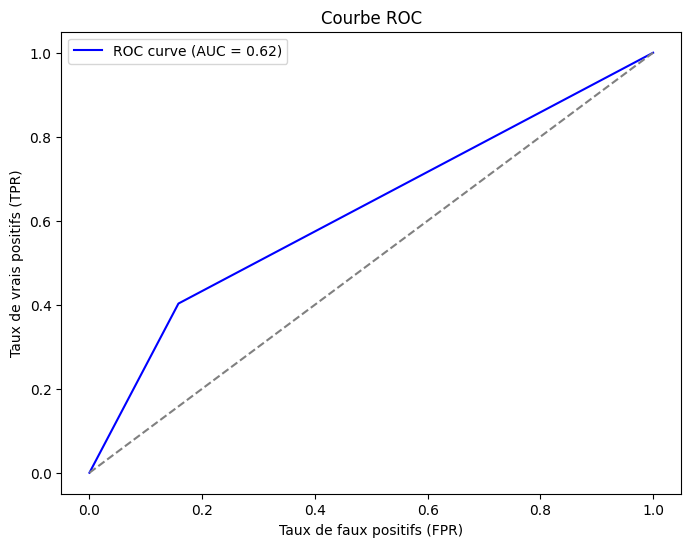

In [ ]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_base, tpr_base)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [ ]:
y_test_pred = sig_model.predict(x_test)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
roc_auc_score(y_test,y_test_pred)

0.7213992001351884
[[21684  4065]
 [ 5827  3930]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     25749
           1       0.49      0.40      0.44      9757

    accuracy                           0.72     35506
   macro avg       0.64      0.62      0.63     35506
weighted avg       0.71      0.72      0.71     35506



0.6224587667910321

tirer toutes les colonnes qui nous donnent les info dans placementId et entrainer le modèle

##Ajouter la colonne urls au modèle baseline :

In [ ]:
target_url = final_data['isQualified']
text_dataset_url = TextDataset(final_data['page'],target_url)
X_url = [item['tokens'] for item in text_dataset_url]
y_url = [item['target'] for item in text_dataset_url]
numerical_sequence_url = [[word2idx.get(token,0) for token in sublist] for sublist in X_url]
padded_sequence_url = pad_sequence([torch.tensor(seq) for seq in numerical_sequence_url], batch_first=True, padding_value=0)
padded_sequence_url.shape

torch.Size([177527, 126])

In [ ]:
significant_features = features[['placementId','logRatio','numContextual']]
significant_features.head()

,placementId,logRatio,numContextual
0,babelio.com_google_NA_2_native_NA,-2.192324,0
1,actu.fr_google_NA_2_display_970x90,-2.295260,1
2,leboncoin.fr_google_NA_2_native_NA,-2.813411,0
3,msn.com_google_NA_2_display_728x90,0.000000,0
4,actu.fr_google_NA_4_display_300x250,-3.108149,1


In [ ]:
input_url = padded_sequence_url.reshape(-1, input_dim)
mu_test, log_test= model_vae.encode(input_url)
z_url = model_vae.reparameterize(mu_test, log_test)
print(z_url.shape)
z_url_df = pd.DataFrame(z_url.detach().numpy())
print(z_url_df.shape)

torch.Size([177527, 10])
(177527, 10)


In [ ]:
significant_features.shape
significant_features.head()

,placementId,logRatio,numContextual
0,babelio.com_google_NA_2_native_NA,-2.192324,0
1,actu.fr_google_NA_2_display_970x90,-2.295260,1
2,leboncoin.fr_google_NA_2_native_NA,-2.813411,0
3,msn.com_google_NA_2_display_728x90,0.000000,0
4,actu.fr_google_NA_4_display_300x250,-3.108149,1


In [ ]:
z_url_df.shape
z_url_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.771810,1.536409,-2.474154,-0.100932,-0.831190,2.948599,-1.598279,-3.068420,3.174812,0.399263
1,-1.754171,4.354867,3.323154,0.956259,-3.494482,3.026228,-0.861649,3.093154,-2.680582,-3.823283
2,-3.535761,1.705680,4.945822,3.428657,-1.575578,1.979086,0.046486,3.232080,-4.871643,-6.082384
3,3.295392,-1.522478,-3.718372,-1.281505,-0.291658,-0.747786,-1.520276,-5.123902,6.620021,1.708195
4,-0.429656,4.862354,3.704915,2.438405,-1.598578,4.016796,-0.426820,4.852766,-3.049792,-5.345759


In [ ]:
all_features_df = pd.concat([significant_features.reset_index(drop=True),z_url_df.reset_index(drop=True)],axis=1)
all_features_df.head()

,placementId,logRatio,numContextual,0,1,2,3,4,5,6,7,8,9
0,babelio.com_google_NA_2_native_NA,-2.192324,0,1.771810,1.536409,-2.474154,-0.100932,-0.831190,2.948599,-1.598279,-3.068420,3.174812,0.399263
1,actu.fr_google_NA_2_display_970x90,-2.295260,1,-1.754171,4.354867,3.323154,0.956259,-3.494482,3.026228,-0.861649,3.093154,-2.680582,-3.823283
2,leboncoin.fr_google_NA_2_native_NA,-2.813411,0,-3.535761,1.705680,4.945822,3.428657,-1.575578,1.979086,0.046486,3.232080,-4.871643,-6.082384
3,msn.com_google_NA_2_display_728x90,0.000000,0,3.295392,-1.522478,-3.718372,-1.281505,-0.291658,-0.747786,-1.520276,-5.123902,6.620021,1.708195
4,actu.fr_google_NA_4_display_300x250,-3.108149,1,-0.429656,4.862354,3.704915,2.438405,-1.598578,4.016796,-0.426820,4.852766,-3.049792,-5.345759


In [ ]:
threshold = 0
counts = all_features_df['placementId'].value_counts()
all_features_df['placementId'] = all_features_df['placementId'].apply(lambda x: x if counts[x] >= threshold else 'other')
all_features_df = pd.get_dummies(all_features_df, columns=['placementId'])
all_features_df.columns = all_features_df.columns.astype(str)
all_features_df.columns = all_features_df.columns.astype(str)
all_features_df.head()

,logRatio,numContextual,0,1,2,3,4,5,6,7,...,placementId_zupimages.net_rubicon_1032932_2_native_NA,placementId_zupimages.net_rubicon_1078310_2_display_728x90,placementId_zupimages.net_rubicon_1124628_2_display_300x250,placementId_zupimages.net_rubicon_1320550_1_display_728x90,placementId_zupimages.net_rubicon_2831456_2_display_728x90,placementId_zupimages.net_smartadserver_26328_5_display_728x90,placementId_zupimages.net_smartadserver_97373_2_native_NA,placementId_zupimages.net_smartadserver_MTcxOTk1MSA5NzM3Mw_2_native_NA,placementId_zupimages.net_smartadserver_MTcxOTk1MSA5NzM3Mw_4_native_NA,placementId_zygeneration.com_google_NA_4_video_NA
0,-2.192324,0,1.771810,1.536409,-2.474154,-0.100932,-0.831190,2.948599,-1.598279,-3.068420,...,False,False,False,False,False,False,False,False,False,False
1,-2.295260,1,-1.754171,4.354867,3.323154,0.956259,-3.494482,3.026228,-0.861649,3.093154,...,False,False,False,False,False,False,False,False,False,False
2,-2.813411,0,-3.535761,1.705680,4.945822,3.428657,-1.575578,1.979086,0.046486,3.232080,...,False,False,False,False,False,False,False,False,False,False
3,0.000000,0,3.295392,-1.522478,-3.718372,-1.281505,-0.291658,-0.747786,-1.520276,-5.123902,...,False,False,False,False,False,False,False,False,False,False
4,-3.108149,1,-0.429656,4.862354,3.704915,2.438405,-1.598578,4.016796,-0.426820,4.852766,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(all_features_df,target_url,test_size=0.2,random_state=42)

In [ ]:
#normaliser les colonnes de z
from sklearn.preprocessing import MinMaxScaler
z_url_columns = [str(col) for col in z_url_df.columns]
scaler = MinMaxScaler()
x_train[z_url_columns] = scaler.fit_transform(x_train[z_url_columns])
x_test[z_url_columns] = scaler.transform(x_test[z_url_columns])

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# sig_model = XGBClassifier()
# sig_model.fit(x_train,y_train)
# y_pred = sig_model.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))

In [ ]:
# rus_tot = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # On garde un ratio de 50%
# x_train_bal_tot, y_train_bal_tot = rus_tot.fit_resample(x_train, y_train)
# print(y_train_bal_tot[y_train_bal_tot == 0].shape[0])
# print(y_train_bal_tot[y_train_bal_tot == 1].shape[0])
# scale_pos_weight_tot = y_train_bal_tot.value_counts()[0] / y_train_bal_tot.value_counts()[1]
# sig_model = XGBClassifier(eval_metric="logloss",tree_method="hist",scale_pos_weight=scale_pos_weight)
# sig_model.fit(x_train,y_train)
# y_pred = sig_model.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))

In [ ]:
rus_tot = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # On garde un ratio de 50%
x_train_bal_tot, y_train_bal_tot = rus_tot.fit_resample(x_train, y_train)
print(y_train_bal_tot[y_train_bal_tot == 0].shape[0])
print(y_train_bal_tot[y_train_bal_tot == 1].shape[0])
scale_pos_weight_tot = y_train_bal_tot.value_counts()[0] / y_train_bal_tot.value_counts()[1]
params = {
    "n_estimators": [200,300],
    "max_depth": [4,6],
    "learning_rate": [0.05],
    "subsample": [0.9],
    "colsample_bytree": [0.7],
    "min_child_weight": [5],  # Contrôle la complexité des arbres
    "gamma": [1],  # Pénalité pour éviter les feuilles trop homogènes
    "reg_lambda": [1],  # Régularisation L2 pour éviter l'overfitting
}
# cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)  # 2 splits, 20% test
grid_search = GridSearchCV(XGBClassifier(eval_metric="logloss",tree_method="hist",scale_pos_weight=scale_pos_weight),
                           param_grid=params,
                           scoring="roc_auc",
                           cv=2,
                           verbose=1,
                           n_jobs=4)
# x_train_sample = x_train_bal.sample(frac=0.3, random_state=42)  # Garde 30% des données
# y_train_sample = y_train_bal.loc[x_train_sample.index]
grid_search.fit(x_train_bal_tot, y_train_bal_tot)

best_params = grid_search.best_params_
best_params["scale_pos_weight"] = scale_pos_weight
sig_model = XGBClassifier(**best_params)
# Entraînement du modèle
sig_model.fit(
    x_train_bal_tot, y_train_bal_tot,
    eval_set=[(x_test, y_test)],  # Ensemble de validation
    # early_stopping_rounds=10,  # Arrêt précoce si pas d'amélioration
    verbose=True  # Afficher les logs pendant l'entraînement
)

# Prédictions
y_train_pred = sig_model.predict(x_train)
y_pred = sig_model.predict(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


78876
39438
Fitting 2 folds for each of 4 candidates, totalling 8 fits


<ipython-input-84-ca099b51161f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale_pos_weight_tot = y_train_bal_tot.value_counts()[0] / y_train_bal_tot.value_counts()[1]


[0]	validation_0-logloss:0.68874
[1]	validation_0-logloss:0.68459
[2]	validation_0-logloss:0.68100
[3]	validation_0-logloss:0.67762
[4]	validation_0-logloss:0.67458
[5]	validation_0-logloss:0.67131
[6]	validation_0-logloss:0.66891
[7]	validation_0-logloss:0.66612
[8]	validation_0-logloss:0.66424
[9]	validation_0-logloss:0.66203
[10]	validation_0-logloss:0.65984
[11]	validation_0-logloss:0.65788
[12]	validation_0-logloss:0.65621
[13]	validation_0-logloss:0.65459
[14]	validation_0-logloss:0.65287
[15]	validation_0-logloss:0.65141
[16]	validation_0-logloss:0.65028
[17]	validation_0-logloss:0.64904
[18]	validation_0-logloss:0.64775
[19]	validation_0-logloss:0.64695
[20]	validation_0-logloss:0.64598
[21]	validation_0-logloss:0.64498
[22]	validation_0-logloss:0.64400
[23]	validation_0-logloss:0.64319
[24]	validation_0-logloss:0.64247
[25]	validation_0-logloss:0.64178
[26]	validation_0-logloss:0.64108
[27]	validation_0-logloss:0.64054
[28]	validation_0-logloss:0.64005
[29]	validation_0-loglos

###Résultats finaux :

Train Accuracy: 0.7075502918582464

Test Accuracy: 0.7014870726074466

Accuracy : 0.7014870726074466
Confusion Matrix :

[[19529           6220]

 [ 4379           5378]]

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     25749
           1       0.46      0.55      0.50      9757

    accuracy                           0.70     35506
    macro avg       0.64      0.65      0.65     35506
    weighted avg       0.72      0.70      0.71     35506

ROC AUC score : 0.6548156177083